In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving despob_pob_actividad_ocupados_ipc_pib_2023.csv to despob_pob_actividad_ocupados_ipc_pib_2023.csv
User uploaded file "despob_pob_actividad_ocupados_ipc_pib_2023.csv" with length 14593 bytes


In [ ]:
import pandas as pd
import io
df_ = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), sep=";")
df_.head()

cod_prov          nom_prov  porcen_desp  pob_tot  pob_hom  pob_muj  \
0         1       Araba/Álava           80   336686   165743   170943   
1         2          Albacete           73   387174   193676   193498   
2         3  Alicante/Alacant           44  1950357   963046   987311   
3         4           Almería           62   753920   385180   368740   
4         5             Ávila           94   158407    79551    78856   

   asexos_tactividad  asexos_templeo  asexos_tparo  hombres_tactividad  ...  \
0              58.33           54.36          6.80               64.94  ...   
1              59.00           51.98         11.88               66.18  ...   
2              58.41           50.70         13.22               63.68  ...   
3              61.16           51.44         15.87               67.63  ...   
4              53.84           47.52         11.72               60.37  ...   

   pib_prec  pib_agri  pib_indu  pib_ind_manu  pib_constr  pib_comer  \
0  12939983    201362   3832143       3473573      400677    1946392   
1   8663814    884324   1397006       1018831      465911    1559382   
2  37279735    547312   3627964       2916222     2556047    9851680   
3  15659622   2443690   1348695       1020119      723957    3793774   
4   3300110    141202    324441        251439      266759     645518   

   pib_act_fin  pib_admin  pib_valor_brut  pib_imp_netos  
0      2434844    2891885        11707303        1232680  
1      1440261    2091603         7838487         825327  
2      8929332    8216082        33728417        3551318  
3      2816431    3041318        14167865        1491757  
4       678479     929338         2985737         314373  

[5 rows x 41 columns]

In [ ]:
df_.drop(['nom_prov', 'cod_prov'], axis=1, inplace=True)

In [ ]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [ ]:
df = df_[['ipc_vivi', 'pib_constr', 'pib_act_fin', 'porcen_desp']]

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.33)
display_side_by_side(train.tail(),test.head())

ipc_vivi 
 pib_constr 
 pib_act_fin 
 porcen_desp 
 
 
 
 
 9 
 100.06 
 595778 
 1393426 
 87 
 
 
 23 
 108.24 
 587871 
 2139793 
 85 
 
 
 32 
 104.18 
 1392272 
 5075288 
 50 
 
 
 10 
 100.28 
 1228858 
 4743273 
 13 
 
 
 45 
 100.74 
 3179743 
 13769682 
 48 
 
 
 
 
 
 
 ipc_vivi 
 pib_constr 
 pib_act_fin 
 porcen_desp 
 
 
 
 
 0 
 100.95 
 400677 
 2434844 
 80 
 
 
 11 
 101.82 
 758542 
 2748923 
 77 
 
 
 29 
 100.70 
 1705143 
 6215565 
 11 
 
 
 31 
 104.90 
 426962 
 1188820 
 75 
 
 
 4 
 109.17 
 266759 
 678479 
 94

#1. Parametrización


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

El regresor


In [ ]:
regressor = RandomForestRegressor()
regressor

RandomForestRegressor()

## GridSearch

In [ ]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
param_dist = {"n_estimators": [32, 64, 128], # Number of trees in random forest
              "max_features": ['sqrt'], # Number of features to consider at every split       # "max_features": ['auto', 'sqrt']
              "max_depth": [8,4, 2], # Maximum number of levels in tree
              "min_samples_split": [2, 4, 6], #  Minimum number of samples required to split a node
              "min_samples_leaf": [8, 12, 16], # Minimum number of samples required at each leaf node
              "bootstrap": [True, False] # Method of selecting samples for training each tree
            }

In [ ]:
grid_regres = GridSearchCV(estimator = regressor, param_grid= param_dist, cv = 5)

grid_regres.fit(X = train.drop(['porcen_desp'], axis=1),
                           y = train['porcen_desp'])

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [8, 4, 2],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [8, 12, 16],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [32, 64, 128]})

In [ ]:
report(grid_regres.cv_results_, n_top = 5)

Model with rank: 1
Mean validation score: 0.225 (std: 0.201)
Parameters: {'bootstrap': True, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 6, 'n_estimators': 32}

Model with rank: 2
Mean validation score: 0.220 (std: 0.215)
Parameters: {'bootstrap': False, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 128}

Model with rank: 3
Mean validation score: 0.220 (std: 0.177)
Parameters: {'bootstrap': False, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 12, 'min_samples_split': 2, 'n_estimators': 32}

Model with rank: 4
Mean validation score: 0.217 (std: 0.218)
Parameters: {'bootstrap': False, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 6, 'n_estimators': 128}

Model with rank: 5
Mean validation score: 0.216 (std: 0.200)
Parameters: {'bootstrap': False, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estima

In [ ]:
grid_regres.best_estimator_

RandomForestRegressor(max_depth=4, max_features='sqrt', min_samples_leaf=8,
                      min_samples_split=6, n_estimators=32)

In [ ]:
best_grid = grid_regres.best_estimator_

best_grid.fit( X = train.drop(['porcen_desp'], axis=1), y = train['porcen_desp'])
y_pred = best_grid.predict(X = test.drop(['porcen_desp'], axis = 1))

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['porcen_desp'], y_pred)
print ('MAE', mae)

MAE 17.10308320598427


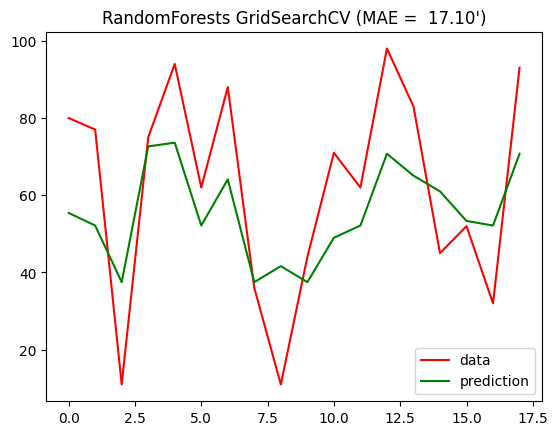

In [ ]:
from sklearn.metrics import mean_absolute_error

import numpy as np
xx = np.stack(list(i for i in range(test['porcen_desp'].shape[0])))
plt.plot(xx, test['porcen_desp'], c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests GridSearchCV (MAE = %6.2f')" % ( mae))

plt.show()

In [ ]:
print ('Feature Relevancies')
pd.DataFrame({'Attributes': ('pib_constr', 'pib_act_fin', 'ipc_vivi') ,
              'Decision Tree': best_grid.feature_importances_})

Feature Relevancies


Attributes  Decision Tree
0   pib_constr       0.297726
1  pib_act_fin       0.333206
2     ipc_vivi       0.369068

## RandomizedSearch



In [ ]:
param_dist = {"n_estimators": [4, 8, 16, 32, 64, 128], # Number of trees in random forest
              "max_features": [5, 'sqrt'], # Number of features to consider at every split       #"max_features": ['auto', 'sqrt']
              "max_depth": [16, 12,8,4, 2,None], # Maximum number of levels in tree
              "min_samples_split": sp_randint(2, 50), #  Minimum number of samples required to split a node
              "min_samples_leaf": sp_randint(1, 50), # Minimum number of samples required at each leaf node
              "bootstrap": [True, False], # Method of selecting samples for training each tree
              "criterion": ["squared_error"]}                                                     # "criterion": ["mse", "mae"]

In [ ]:
df = df_[['ipc_vivi', 'pib_constr', 'pib_act_fin', 'porcen_desp']]

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.33)
display_side_by_side(train.tail(),test.head())

ipc_vivi 
 pib_constr 
 pib_act_fin 
 porcen_desp 
 
 
 
 
 12 
 106.55 
 660968 
 1715384 
 64 
 
 
 20 
 100.18 
 485002 
 2041220 
 45 
 
 
 34 
 101.14 
 1273844 
 4935073 
 8 
 
 
 2 
 99.05 
 2556047 
 8929332 
 44 
 
 
 46 
 105.14 
 656713 
 2781737 
 88 
 
 
 
 
 
 
 ipc_vivi 
 pib_constr 
 pib_act_fin 
 porcen_desp 
 
 
 
 
 10 
 100.28 
 1228858 
 4743273 
 13 
 
 
 42 
 103.59 
 1137251 
 5643875 
 66 
 
 
 40 
 99.49 
 2056824 
 8537199 
 13 
 
 
 28 
 99.85 
 2484676 
 8534746 
 44 
 
 
 21 
 105.47 
 442920 
 1055854 
 93

In [ ]:
rnd_regres = RandomizedSearchCV(estimator = regressor, param_distributions = param_dist,
                               n_iter = 100, cv = 5, random_state=0, n_jobs = -1)
# Fit the random search model
rnd_regres.fit(X = train.drop(['porcen_desp'], axis=1),
                           y = train['porcen_desp'])

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error'],
                                        'max_depth': [16, 12, 8, 4, 2, None],
                                        'max_features': [5, 'sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ce5f1ad7220>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ce5f1ad6320>,
                                        'n_estimators': [4, 8, 16, 32, 64,
                                                         128]},
                   random_state=0)

In [ ]:
report(rnd_regres.cv_results_, n_top = 5)

Model with rank: 1
Mean validation score: 0.138 (std: 0.226)
Parameters: {'bootstrap': True, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 16}

Model with rank: 2
Mean validation score: -0.055 (std: 0.382)
Parameters: {'bootstrap': True, 'criterion': 'squared_error', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 64}

Model with rank: 3
Mean validation score: -0.160 (std: 0.342)
Parameters: {'bootstrap': False, 'criterion': 'squared_error', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 14, 'min_samples_split': 7, 'n_estimators': 4}

Model with rank: 4
Mean validation score: -0.171 (std: 0.172)
Parameters: {'bootstrap': True, 'criterion': 'squared_error', 'max_depth': 16, 'max_features': 5, 'min_samples_leaf': 6, 'min_samples_split': 40, 'n_estimators': 4}

Model with rank: 5
Mean validation score: -0.179 (std: 0.320)
Parameter

In [ ]:
rnd_regres.best_params_

{'bootstrap': True,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'n_estimators': 16}

Una vez que hemos identificado la mejor parametrización vamos a pasar a hacer una ejecución del modelo y vamos graficar sus resultados.

Al final del paso 1 hemos dividido en entrenamiento/tuneado y test.

Posteriormente, vamos a ejecutar el modelo con la mejor parametrización que hayamos obtenido anteriormente

In [ ]:
best_random = rnd_regres.best_estimator_
# entrenar y predecir
best_random.fit( X = train.drop(['porcen_desp'], axis=1), y = train['porcen_desp'])
y_pred = best_random.predict(X = test.drop(['porcen_desp'], axis = 1))

# evaluar
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['porcen_desp'], y_pred)
print ('MAE', mae)

MAE 16.944028987653216


Por último probamos visualizamos como ha quedado nuestra predicción con la realidad.

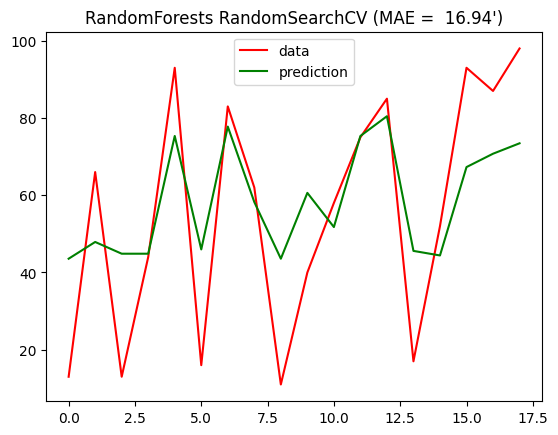

In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np

xx = np.stack(list(i for i in range(test['porcen_desp'].shape[0])))
plt.plot(xx, test['porcen_desp'], c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests RandomSearchCV (MAE = %6.2f')" % ( mae))

plt.show()

In [ ]:
columns = list(df.columns.values)
columns.remove('porcen_desp')
print ('Feature Relevancies')
pd.DataFrame({'Attributes': columns ,
              'Random Forests': best_random.feature_importances_})

Feature Relevancies


Attributes  Random Forests
0     ipc_vivi        0.429123
1   pib_constr        0.343769
2  pib_act_fin        0.227108

## Boosting

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

param_dist = {
 "n_estimators": [8, 32, 64, 128],
 "learning_rate" : [0.01,0.05,0.1],
 "loss" : ['linear', 'square', 'exponential']
 }
grid_ada = GridSearchCV(AdaBoostRegressor(DecisionTreeRegressor(criterion='squared_error')),
                        param_grid = param_dist, cv=5)

grid_ada.fit(X = train.drop(['porcen_desp'], axis=1),y = train['porcen_desp'])

best_ada = grid_ada.best_estimator_
print (best_ada)
# entrenar y predecir
best_ada.fit( X = train.drop(['porcen_desp'], axis=1), y = train['porcen_desp'])
y_pred = best_ada.predict(X = test.drop(['porcen_desp'], axis = 1))

# evaluar
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['porcen_desp'], y_pred)
print ('MAE', mae)

AdaBoostRegressor(estimator=DecisionTreeRegressor(), learning_rate=0.01,
                  loss='square', n_estimators=8)
MAE 17.444444444444443


Para GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

param_dist = {
 "n_estimators": [32, 64, 128],
 "learning_rate" : [0.01,0.05,0.1,0.25,0.5],
  "max_features" : ['sqrt'],
 "loss" : ['squared_error', 'quantile', 'huber', 'absolute_error'],
 "criterion": ['squared_error', 'friedman_mse']
 }
grid_gb = GridSearchCV(GradientBoostingRegressor(), param_grid = param_dist, cv=5)

grid_gb.fit(X = train.drop(['porcen_desp'], axis=1),y = train['porcen_desp'])

best_gb = grid_gb.best_estimator_
print (best_gb)
# entrenar y predecir
best_gb.fit( X = train.drop(['porcen_desp'], axis=1), y = train['porcen_desp'])
y_pred = best_gb.predict(X = test.drop(['porcen_desp'], axis = 1))

# evaluar
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['porcen_desp'], y_pred)
print ('MAE', mae)

GradientBoostingRegressor(learning_rate=0.01, max_features='sqrt',
                          n_estimators=64)
MAE 21.941236830750633
